# Lab 2

## Prepare data

As a data was used https://www.kaggle.com/muonneutrino/us-census-demographic-data?select=acs2015_county_data.csv

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score

In [0]:
data_set = pd.read_csv('acs2015_county_data.csv')
data_set.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [0]:
data_set.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3219.000000,3219.000000,3220.000000,3220.000000,3220.000000,3219.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,6.993507e+04,46129.868903,2850.395464,23981.771739,1362.518944,17.493261,24.180801,30.990621,18.346398,22.215807,12.714099,15.733385,79.181925,10.278758,0.971832,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,2.051189e+05,12911.297940,1918.942273,6204.339960,1049.875689,8.317883,11.698329,6.368379,3.635764,3.199682,4.216784,5.736308,7.657972,2.907897,3.059019,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+01,10499.000000,270.000000,5878.000000,113.000000,1.400000,0.000000,13.500000,5.000000,4.100000,1.700000,0.000000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,8.450500e+03,38191.500000,1635.000000,20238.500000,755.000000,12.100000,16.300000,26.700000,16.000000,20.200000,9.800000,11.500000,76.600000,8.400000,0.100000,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,1.964300e+04,44749.000000,2406.000000,23460.000000,1096.500000,16.150000,22.700000,29.900000,18.100000,22.400000,12.100000,15.250000,80.700000,9.900000,0.400000,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,4.992050e+04,52074.000000,3446.000000,27053.250000,1631.000000,20.700000,30.000000,34.400000,20.300000,24.400000,14.900000,19.325000,83.700000,11.800000,0.800000,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,6.046749e+06,123453.000000,21355.000000,65600.000000,15266.000000,64.200000,81.600000,74.000000,38.200000,35.400000,40.300000,55.600000,94.600000,29.900000,61.700000,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [0]:
data_set.isna().sum()

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [0]:
data_set = data_set.fillna(0)

In [0]:
variables = ["State", "Unemployment", "Drive", "Black", "TotalPop", "White", "Poverty", "Construction", "WorkAtHome"]
pr_vars = variables[2:]
target = variables[1]
data = data_set[variables].copy()
data.shape

(3220, 9)

In [0]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75) 
    iqr = q3-q1 
    minimum  = q1-1.5*iqr 
    maximum = q3+1.5*iqr 
    return median, q1, q3, iqr, minimum, maximum

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

for var in variables[2:]:
  data = remove_outliers(data, var)

In [0]:
data.head()

,State,Unemployment,Drive,Black,TotalPop,White,Poverty,Construction,WorkAtHome
0,Alabama,7.6,87.5,18.5,55221,75.8,12.9,8.6,1.8
3,Alabama,8.3,83.2,21.4,22604,74.5,16.8,19.0,0.7
4,Alabama,7.7,84.9,1.5,57710,87.9,16.7,13.5,2.3
7,Alabama,12.3,85.3,20.3,116648,73.0,20.5,10.5,2.7
9,Alabama,7.9,83.9,4.8,26008,91.7,19.2,13.7,2.5


In [0]:
data.shape

(1952, 9)

## Task 1

You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV) .

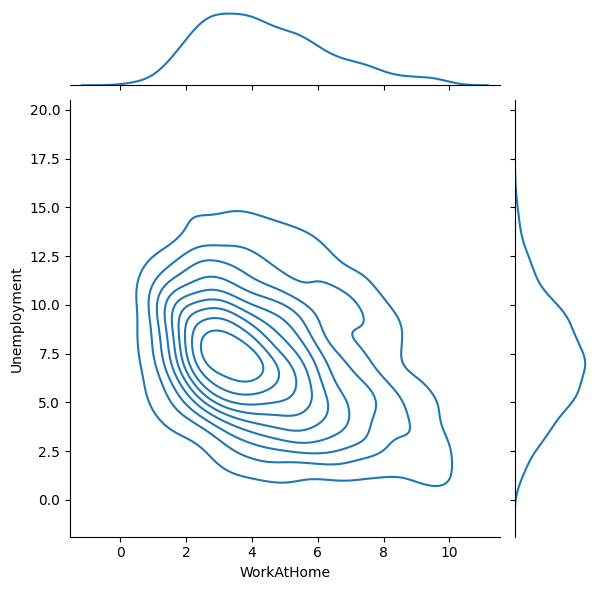

In [0]:
def plot_pdf(d, p, t):
  sns.jointplot(data=d, x=p, y=t, kind="hist")
  sns.jointplot(data=d, x=p, y=t, kind='kde')
  plt.show()

for pr_var in pr_vars:
    plot_pdf(data, pr_var, target)

## Task 2

You need to make an estimation of multivariate mathematical expectation and
variance.

In [0]:
data.mean()

Unemployment        7.190625
Drive              80.502203
Black               3.609682
TotalPop        36302.485656
White              86.689805
Poverty            15.391035
Construction       12.785656
WorkAtHome          4.374949
dtype: float64

In [0]:
data.var()

Unemployment    7.983597e+00
Drive           1.994534e+01
Black           2.610848e+01
TotalPop        1.148375e+09
White           1.060622e+02
Poverty         2.425964e+01
Construction    9.952403e+00
WorkAtHome      3.693104e+00
dtype: float64

## Task 3

You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

Texas state:
Unemployment mean: 6.58721804511278
Unemployment variance: 7.823699020277969

Georgia state:
Unemployment mean: 8.989285714285712
Unemployment variance: 5.294792207792207

Texas state:
Drive mean: 80.79548872180449
Drive variance: 18.478767372977906

Georgia state:
Drive mean: 82.89642857142856
Drive variance: 12.742168831168833

Texas state:
Black mean: 7.036090225563915
Black variance: 41.74989974937344

Georgia state:
Black mean: 10.710714285714285
Black variance: 54.81624675324675

Texas state:
TotalPop mean: 32236.563909774435
TotalPop variance: 1184463334.0356572

Georgia state:
TotalPop mean: 42590.83928571428
TotalPop variance: 1286436326.8646104

Texas state:
White mean: 70.98796992481208
White variance: 105.07061175666438

Georgia state:
White mean: 79.79107142857143
White variance: 99.5782824675325

Texas state:
Poverty mean: 15.873684210526314
Poverty variance: 21.573317384370007

Georgia state:
Poverty mean: 17.537499999999998
Poverty variance: 23.465295454545

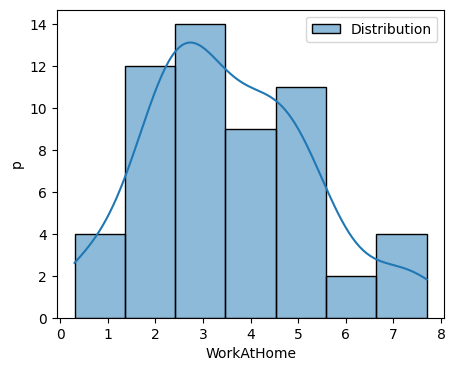

In [0]:
def plot_mvd(d, vs):
  states = ["Texas", "Georgia"]

  for v in vs:
    for state in states:
      print(str(state) + " state:")
      sample = d[d["State"] == state]

      print(v + " mean: " + str(sample.mean()[v]))
      print(v + " variance: " + str(sample.var()[v]))
      print()

      plt.figure(figsize=(5, 4))
      sns.histplot(sample[v], kde=True, label="Distribution")
      plt.ylabel('p')
      plt.legend()
      plt.show()

plot_mvd(data, variables[1:])

## Task 4

You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [0]:
def pearson_data(x, y, a=0.05):
  r, p = scipy.stats.pearsonr(x, y)
  r_z = np.arctanh(r)
  se = 1 / np.sqrt(x.size-3)
  z = scipy.stats.norm.ppf(1-a/2)
  lo_z, hi_z = r_z - z * se, r_z + z * se
  lo, hi = np.tanh((lo_z, hi_z))
  return p, lo, hi

def print_pearson(x, y):
  p, lo, hi = pearson_data(x, y)
  print("Significance level: " + str(p))
  print("Confidence interval: " + str(lo) + ".." + str(hi))
  print()

for pr_var in pr_vars:
  print(pr_var + " and " + target + ":")
  print_pearson(data[pr_var], data[target])

Drive and Unemployment:
Significance level: 9.003373395649695e-15
Confidence interval: 0.13088460293212964..0.2169292214585377

Black and Unemployment:
Significance level: 1.0687969990142755e-30
Confidence interval: 0.21456716950256136..0.29747366386630314

TotalPop and Unemployment:
Significance level: 8.239712736310603e-12
Confidence interval: 0.11025000123997337..0.1968867197134455

White and Unemployment:
Significance level: 2.223803296019002e-08
Confidence interval: -0.1695974457950883..-0.08227410393716378

Poverty and Unemployment:
Significance level: 2.408513753858394e-182
Confidence interval: 0.5588290602265481..0.6168600915655272

Construction and Unemployment:
Significance level: 0.11326634198728683
Confidence interval: -0.08009564185891627..0.00852386817395777

WorkAtHome and Unemployment:
Significance level: 1.1463542744505644e-54
Confidence interval: -0.3805647713665518..-0.3021902767059944



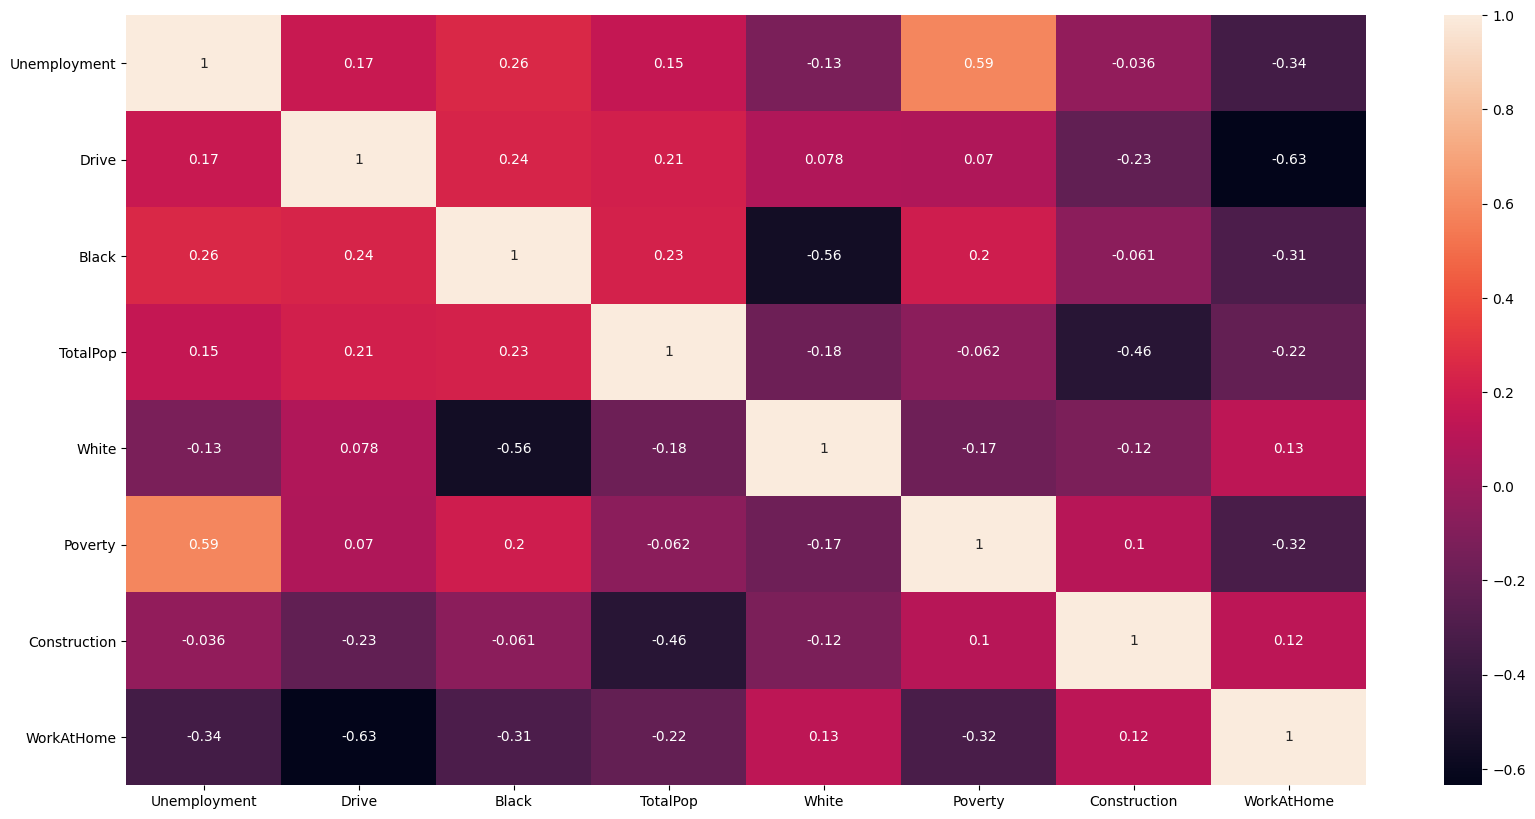

In [0]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(method="pearson"), annot=True)

## Task 5

Choose a task formulation for regression. Estimate multivariate correlation (target -
predictors).

### Chosen task: using Poverty, Construnction, WorkAtHome and Black, predict Unemployment

## Task 6

Build regression model and make an analysis of multicollinearity and regularization (if needed).

In [0]:
ols_data = data[variables]
model = ols("Unemployment ~ Black + Poverty + Construction + WorkAtHome", data=ols_data).fit()
print(model.params)
print(model.summary())

Intercept       3.909099
Black           0.059231
Poverty         0.305776
Construction   -0.061639
WorkAtHome     -0.194378
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     309.8
Date:                Wed, 21 Apr 2021   Prob (F-statistic):          2.33e-206
Time:                        11:45:28   Log-Likelihood:                -4316.1
No. Observations:                1952   AIC:                             8642.
Df Residuals:                    1947   BIC:                             8670.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025  

In [0]:
model.get_influence().summary_frame().describe()

,dfb_Intercept,dfb_Black,dfb_Poverty,dfb_Construction,dfb_WorkAtHome,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
count,1952.000000,1952.000000,1952.000000,1952.000000,1.952000e+03,1.952000e+03,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,0.000002,-0.000002,-0.000005,0.000001,-9.170679e-07,5.575855e-04,-0.000068,0.002561,-0.001234,0.000010,-0.001232
std,0.021790,0.023399,0.023966,0.024129,2.425367e-02,1.246955e-03,1.000364,0.001774,0.052800,1.001037,0.052836
min,-0.172917,-0.274501,-0.154679,-0.141808,-1.732250e-01,1.836557e-10,-3.491276,0.000520,-0.368485,-3.501357,-0.369549
25%,-0.007666,-0.005535,-0.007066,-0.007465,-7.608185e-03,3.333778e-05,-0.661404,0.001342,-0.029028,-0.661308,-0.029025
50%,0.000011,0.000232,0.000270,-0.000167,-4.499822e-05,1.548747e-04,-0.030108,0.001990,-0.001274,-0.030100,-0.001274
75%,0.007808,0.006525,0.007967,0.006213,7.263814e-03,5.510699e-04,0.593884,0.003239,0.026597,0.593785,0.026595
max,0.121842,0.201943,0.137186,0.150864,1.470548e-01,2.715619e-02,4.556172,0.012250,0.246673,4.579481,0.247040


In [0]:

np.linalg.cond(model.model.exog)

125.07195072777682

## Task 7

Analyze the quality of regression model (distribution of residuals, determination coefficient).

In [0]:
print("R2 score:", r2_score(ols_data["Unemployment"], model.predict(ols_data)))

R2 score: 0.38889013732710664


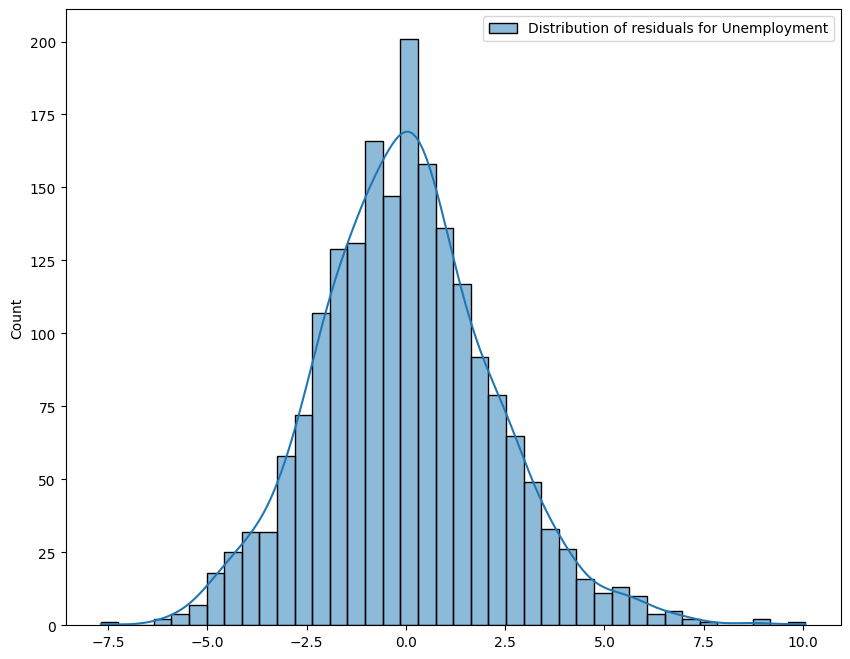

In [0]:
residuals = ols_data["Unemployment"] - model.predict(ols_data)
plt.figure(figsize=(10, 8))
sns.histplot(residuals, kde=True, label=f"Distribution of residuals for Unemployment")
plt.legend()
plt.show()